In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
dataset=pd.read_csv(r'C:\Users\Abhishek Padir\Desktop\income_evaluation.csv')

In [25]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [28]:
dataset.shape

(32561, 15)

In [29]:
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [30]:
dataset.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
income             0
dtype: int64

In [31]:
dataset.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
income                 2
dtype: int64

In [32]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [33]:
duplicate_dataset=dataset[dataset.duplicated()]
duplicate_dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [34]:
def initial_eda(dataset):
    if isinstance(dataset, pd.DataFrame):
        total_na= dataset.isna().sum().sum()
        print("Total records", dataset.shape)
        print("Total number of NA: ", total_na)
        cols_name=dataset.columns
        dtype=dataset.dtypes
        duniq=dataset.nunique()
        na_val=dataset.isna().sum()
        print("Columns dataset","Datatype", "Unique dataset", "NA_vals")
        for i in range(len(dataset.columns)):
            print("%38s %10s %10s %10s"%(cols_name[i], dtype[i], duniq[i], na_val[i]) )
        else:
            print("error in code")
        

In [35]:
initial_eda(dataset)

Total records (32561, 15)
Total number of NA:  0
Columns dataset Datatype Unique dataset NA_vals
                                   age      int64         73          0
                             workclass     object          9          0
                                fnlwgt      int64      21648          0
                             education     object         16          0
                         education-num      int64         16          0
                        marital-status     object          7          0
                            occupation     object         15          0
                          relationship     object          6          0
                                  race     object          5          0
                                   sex     object          2          0
                          capital-gain      int64        119          0
                          capital-loss      int64         92          0
                        hours-per-week 

In [36]:
categorical=[i for i in dataset.columns if dataset[i].dtype == 'O']
print(categorical)

[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', 'income']


In [37]:
dataset[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [38]:
for i in categorical:
    print(dataset[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

Text(0.5, 1.0, 'income Probability')

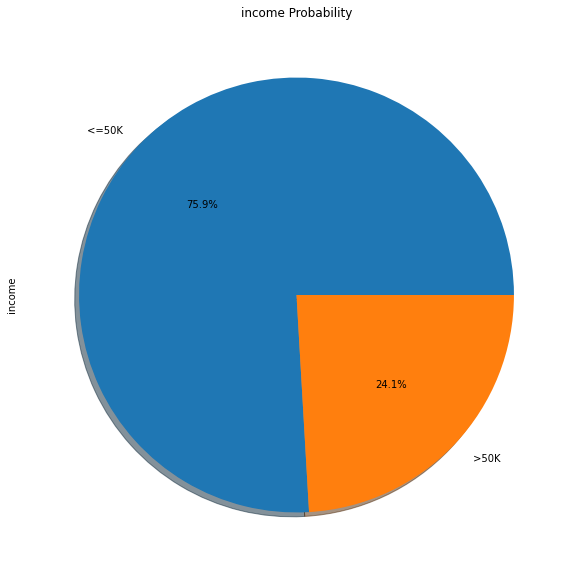

In [39]:
f, ax= plt.subplots(figsize=(10,10))
ax= dataset['income'].value_counts().plot.pie(explode=[0,0],autopct = '%1.1f%%', shadow=True)
ax.set_title('income Probability')

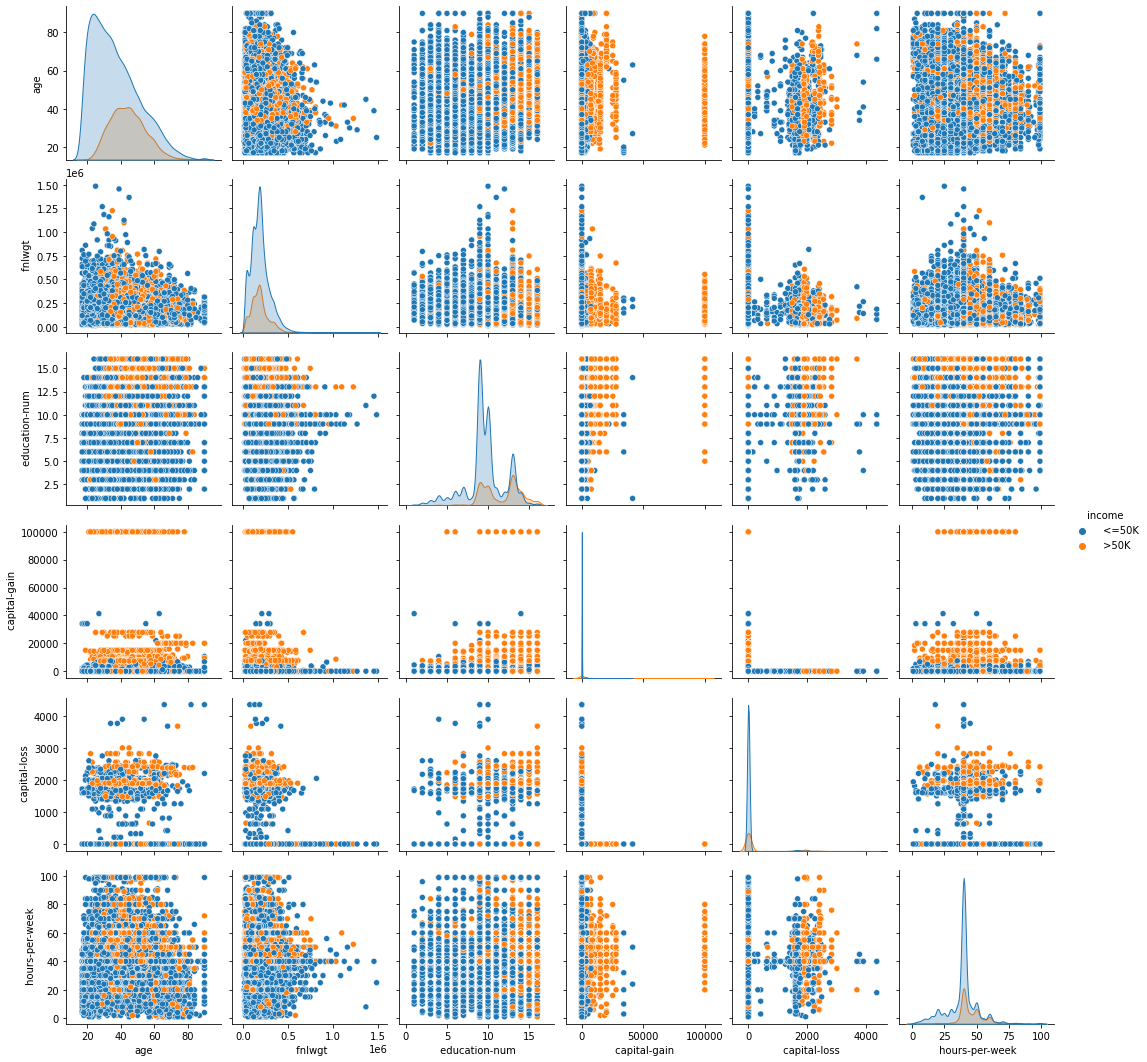

In [40]:
sns.pairplot(dataset,hue='income')
plt.show()

<AxesSubplot:>

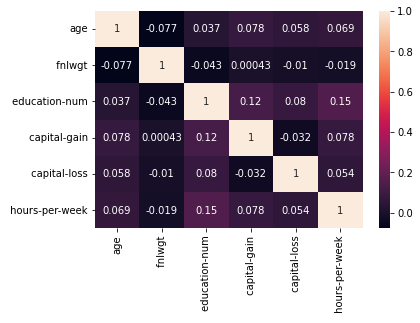

In [41]:
sns.heatmap(dataset.corr(), annot=True)

In [42]:
column_list=['income']
x=dataset.drop(column_list,axis = 1)
y=dataset['income']

In [43]:
print(x.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')


In [44]:
print(y)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object


In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(26048, 14) (6513, 14)


In [46]:
encoder=ce.OrdinalEncoder(cols=[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [47]:
cols=X_train.columns
# X_train = pd.DataFrame(X_train, columns = X.columns)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [48]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
score = accuracy_score(Y_test,y_pred)
print('randomforest classifier score: ',np.abs(score)*100)

randomforest classifier score:  86.02794411177645


In [51]:
feature_score=pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [52]:
print(feature_score)

 fnlwgt            0.167058
age                0.152239
 capital-gain      0.116611
 marital-status    0.098359
 occupation        0.088389
 hours-per-week    0.083460
 education-num     0.081766
 relationship      0.055536
 workclass         0.039066
 capital-loss      0.036207
 education         0.031477
 sex               0.019051
 native-country    0.017144
 race              0.013637
dtype: float64


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.63      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [56]:
column_list=[' race','income']
x=dataset.drop(column_list,axis = 1)
y=dataset['income']

In [57]:
print(x.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')


In [58]:
print(y)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object


In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(26048, 13) (6513, 13)


In [60]:
encoder=ce.OrdinalEncoder(cols=[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' sex', ' native-country'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [61]:
cols=X_train.columns
# X_train = pd.DataFrame(X_train, columns = X.columns)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [62]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
score = accuracy_score(Y_test,y_pred)
print('randomforest classifier score: ',np.abs(score)*100)

randomforest classifier score:  86.27360663288806
